In [1]:
import os
import glob
import random
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
train_path = 'train'
test_path = 'test'
valid_path = 'valid'

In [3]:
train_batches = ImageDataGenerator(rescale=1/255).flow_from_directory(directory=\
                train_path, target_size=(250,150), classes=['damaged', 'non_damaged'])
test_batches = ImageDataGenerator(rescale=1/255).flow_from_directory(directory=\
                test_path, target_size=(250,150), classes=['damaged', 'non_damaged'])
valid_batches = ImageDataGenerator(rescale=1/255).flow_from_directory(directory=\
                valid_path, target_size=(250,150), classes=['damaged', 'non_damaged'])

Found 738 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [4]:
imgs, labels = next(train_batches)

In [5]:
# print(np.shape(imgs[0]))

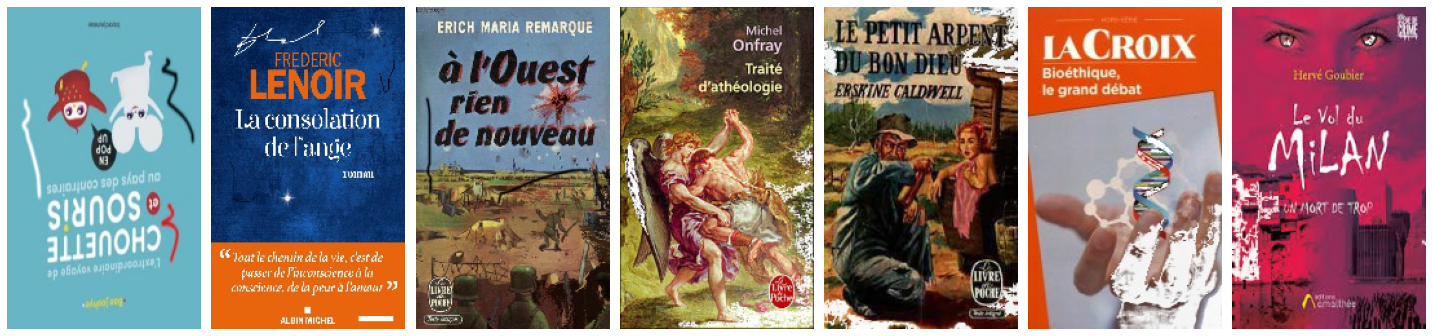

In [6]:
fig, axs = plt.subplots(1,7, figsize=(20,20))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()

In [7]:
for i in range(0,6):
    print(labels[i])

[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]


In [32]:
model = Sequential()

model.add(Conv2D( filters=64, kernel_size=(3,3), activation='relu',\
                 input_shape=(250,150,3), strides=1 ))
model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D( filters=32, kernel_size=(3,3), activation='relu'\
#                 , strides=1))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D( filters=32, kernel_size=(3,3), activation='relu', strides=1 ))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D( filters=32, kernel_size=(3,3), activation='relu'\
#                 , strides=1))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D( filters=32, kernel_size=(3,3), activation='relu'\
#                 , strides=1))
# model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 248, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 124, 74, 64)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 587264)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                37584960  
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 18        
Total params: 37,587,290
Trainable params: 37,587,290
Non-trainable params: 0
__________________________________________

In [34]:
model.compile(optimizer=Adam(learning_rate=1e-3), \
    loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
hitory = model.fit(x=train_batches, validation_data=valid_batches, epochs=50)

Epoch 1/50
24/24 [==============================] - 19s 777ms/step - loss: 11.9314 - accuracy: 0.8702 - val_loss: 1.4864 - val_accuracy: 0.7826
Epoch 2/50
24/24 [==============================] - 22s 905ms/step - loss: 0.4120 - accuracy: 0.9148 - val_loss: 0.6187 - val_accuracy: 0.7826
Epoch 3/50
24/24 [==============================] - 25s 1s/step - loss: 0.2805 - accuracy: 0.9170 - val_loss: 0.5697 - val_accuracy: 0.7826
Epoch 4/50
24/24 [==============================] - 24s 1s/step - loss: 0.2696 - accuracy: 0.9160 - val_loss: 0.6348 - val_accuracy: 0.7826
Epoch 5/50
24/24 [==============================] - 32s 1s/step - loss: 0.2468 - accuracy: 0.9176 - val_loss: 0.7687 - val_accuracy: 0.7826
Epoch 6/50
24/24 [==============================] - 32s 1s/step - loss: 0.2485 - accuracy: 0.9069 - val_loss: 0.8216 - val_accuracy: 0.7826
Epoch 7/50
24/24 [==============================] - 29s 1s/step - loss: 0.2187 - accuracy: 0.9327 - val_loss: 0.7624 - val_accuracy: 0.7609
Epoch 8/50
24

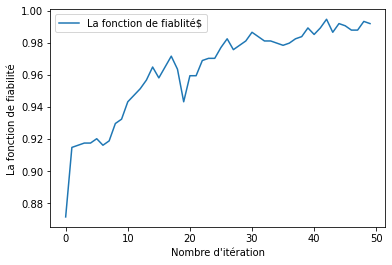

In [36]:
plt.plot(hitory.history['accuracy'], label="La fonction de fiablité$")
# plt.plot(hitory.history['val_loss'], label="La fonction d'erreur de validation")
plt.legend()
plt.xlabel(r"Nombre d'itération")
plt.ylabel(r"La fonction de fiabilité")
plt.savefig('fiabilite_noref_image.png')

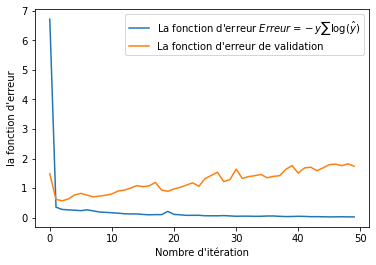

In [37]:
plt.plot(hitory.history['loss'], label="La fonction d'erreur $Erreur = -y \sum \log (\hat{y})$")
plt.plot(hitory.history['val_loss'], label="La fonction d'erreur de validation")
plt.legend()
plt.xlabel(r"Nombre d'itération")
plt.ylabel(r"la fonction d'erreur")
plt.savefig('loss_noref_image.png')

In [83]:
test_imgs, test_labels = next(train_batches)

In [84]:
a = model.predict(test_imgs)

In [101]:
test_img = test_imgs[11]
img = (np.expand_dims(test_img,0))

[0.00433745 0.9956625 ]


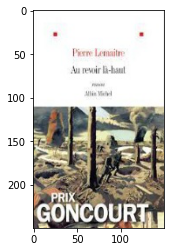

In [102]:
a = model.predict(img)
print(a[0])
plt.imshow(img[0])

In [87]:
print(test_labels, a)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] [[9.9996793e-01 3.2045678e-05]]
